In [5]:
# Carregar pacotes necessários
import pandas as pd

# Carregar o dataset
file_path = 'dataset/expanded_diabetes_dataset.csv'  # Substitua pelo caminho correto do seu arquivo
diabetes_df = pd.read_csv(file_path)

AttributeError: partially initialized module 'pandas' has no attribute '_pandas_parser_CAPI' (most likely due to a circular import)

In [3]:
# Exibir as primeiras linhas e informações básicas
print(diabetes_df.head())

                             Target Genetic Markers Autoantibodies  \
0          Steroid-Induced Diabetes        Positive       Negative   
1  Neonatal Diabetes Mellitus (NDM)        Positive       Negative   
2                       Prediabetic        Positive       Positive   
3                   Type 1 Diabetes        Negative       Positive   
4                  Wolfram Syndrome        Negative       Negative   

  Family History Environmental Factors  Insulin Levels        Age        BMI  \
0             No               Present       38.186845  44.514581  38.276831   
1             No               Present       13.601378   0.959215  17.061191   
2            Yes               Present       25.726708  35.056766  24.794768   
3             No               Present        8.162440   6.998362  16.269794   
4            Yes               Present       16.239333  10.180812  17.513180   

  Physical Activity Dietary Habits  ...  Pulmonary Function  \
0              High        Healthy 

In [4]:
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31407 entries, 0 to 31406
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Target                         31407 non-null  object 
 1   Genetic Markers                31407 non-null  object 
 2   Autoantibodies                 31407 non-null  object 
 3   Family History                 31407 non-null  object 
 4   Environmental Factors          31407 non-null  object 
 5   Insulin Levels                 31407 non-null  float64
 6   Age                            31407 non-null  float64
 7   BMI                            31407 non-null  float64
 8   Physical Activity              31407 non-null  object 
 9   Dietary Habits                 31407 non-null  object 
 10  Blood Pressure                 31407 non-null  float64
 11  Cholesterol Levels             31406 non-null  float64
 12  Waist Circumference            31406 non-null 

In [5]:
print(diabetes_df.isnull().sum())

Target                           0
Genetic Markers                  0
Autoantibodies                   0
Family History                   0
Environmental Factors            0
Insulin Levels                   0
Age                              0
BMI                              0
Physical Activity                0
Dietary Habits                   0
Blood Pressure                   0
Cholesterol Levels               1
Waist Circumference              1
Blood Glucose Levels             1
Ethnicity                        1
Socioeconomic Factors            1
Smoking Status                   1
Alcohol Consumption              1
Glucose Tolerance Test           1
History of PCOS                  1
Previous Gestational Diabetes    1
Pregnancy History                1
Weight Gain During Pregnancy     1
Pancreatic Health                1
Pulmonary Function               1
Cystic Fibrosis Diagnosis        1
Steroid Use History              1
Genetic Testing                  1
Neurological Assessm

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

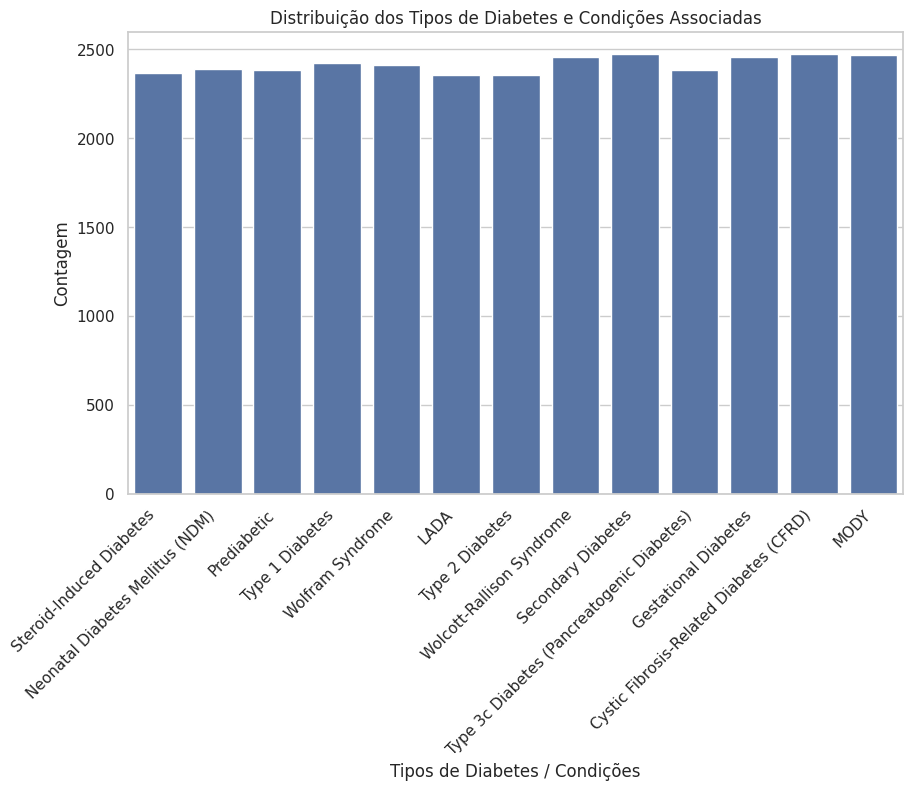

In [7]:
# Configurações para visualização
sns.set(style="whitegrid")

# Distribuição da variável Target
plt.figure(figsize=(10, 6))
sns.countplot(data=diabetes_df, x="Target")
plt.title("Distribuição dos Tipos de Diabetes e Condições Associadas")
plt.xlabel("Tipos de Diabetes / Condições")
plt.ylabel("Contagem")
plt.xticks(rotation=45, ha="right")
plt.show()

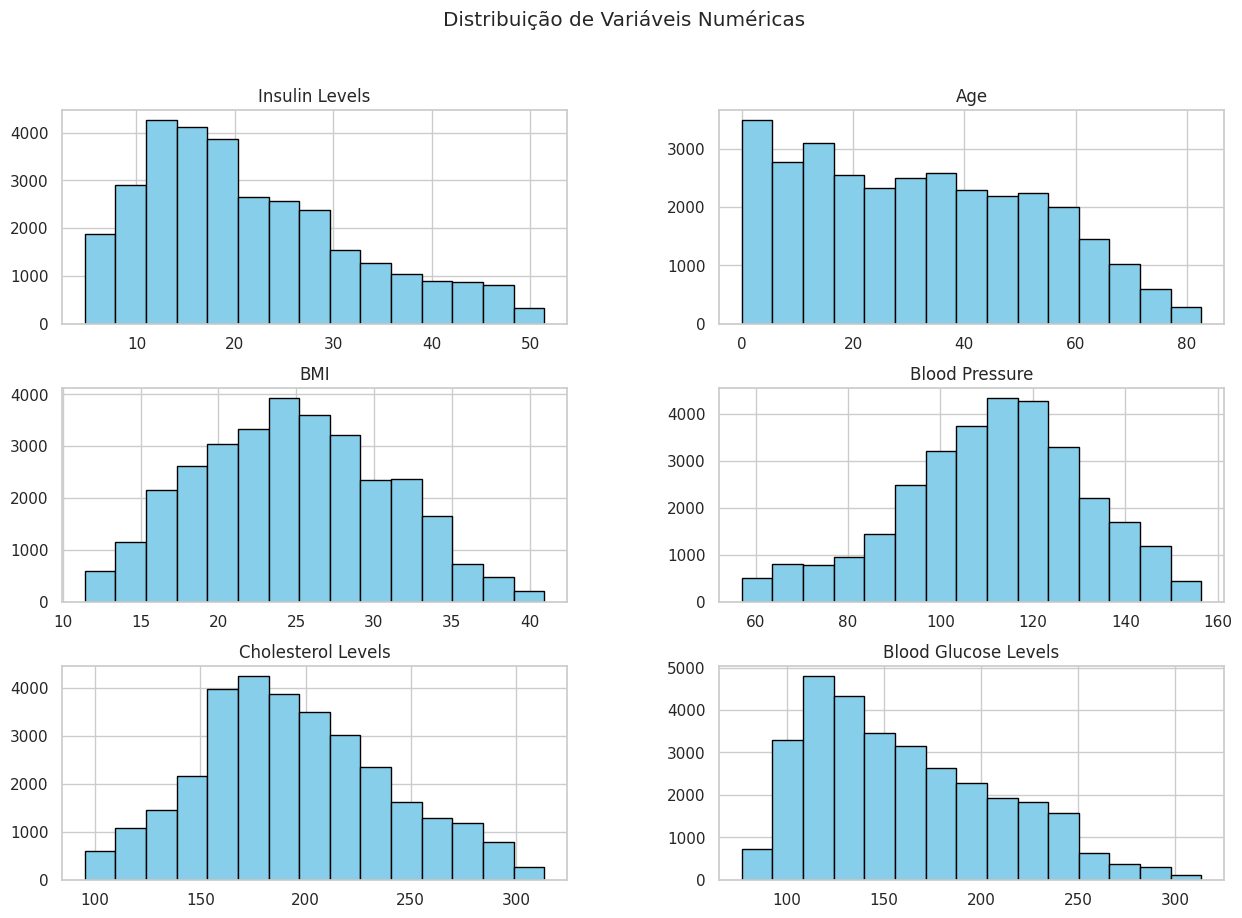

In [8]:
# Distribuição de algumas variáveis numéricas
numeric_cols = ["Insulin Levels", "Age", "BMI", "Blood Pressure", "Cholesterol Levels", "Blood Glucose Levels"]
diabetes_df[numeric_cols].hist(bins=15, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distribuição de Variáveis Numéricas")
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# Separar os dados entre features (X) e target (y)
X = diabetes_df.drop(columns=["Target"])
y = diabetes_df["Target"]

In [11]:
# Identificar colunas numéricas e categóricas
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns
categorical_features = X.select_dtypes(include=["object"]).columns

In [12]:
# Configurar o pré-processador para normalizar e codificar variáveis
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

In [13]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(25125, 72) (6282, 72)


---
# **Versão usando *RandomForest***

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
# Definir o modelo
model = RandomForestClassifier(random_state=42)

In [16]:
# Configuração de hiperparâmetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Busca em grade para encontrar o melhor hiperparâmetro
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Melhor conjunto de hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

In [ ]:
# Avaliação inicial com validação cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Acurácia média (Validação Cruzada):", cv_scores.mean())

Acurácia média (Validação Cruzada): 0.9103749999999999


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Acurácia no conjunto de teste: 0.92


In [ ]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
                                            precision    recall  f1-score   support

   Cystic Fibrosis-Related Diabetes (CFRD)       0.98      0.90      0.94      2133
                      Gestational Diabetes       0.91      0.90      0.90      2164
                                      LADA       0.96      0.94      0.95      2162
                                      MODY       0.91      0.92      0.92      2222
          Neonatal Diabetes Mellitus (NDM)       1.00      1.00      1.00      2157
                               Prediabetic       0.92      0.98      0.95      2169
                        Secondary Diabetes       0.91      0.83      0.87      2212
                  Steroid-Induced Diabetes       0.89      0.85      0.87      2108
                           Type 1 Diabetes       0.92      0.97      0.94      2164
                           Type 2 Diabetes       0.94      0.87      0.90      2139
Type 3c Diabetes (Pancreatogenic Diabetes)     

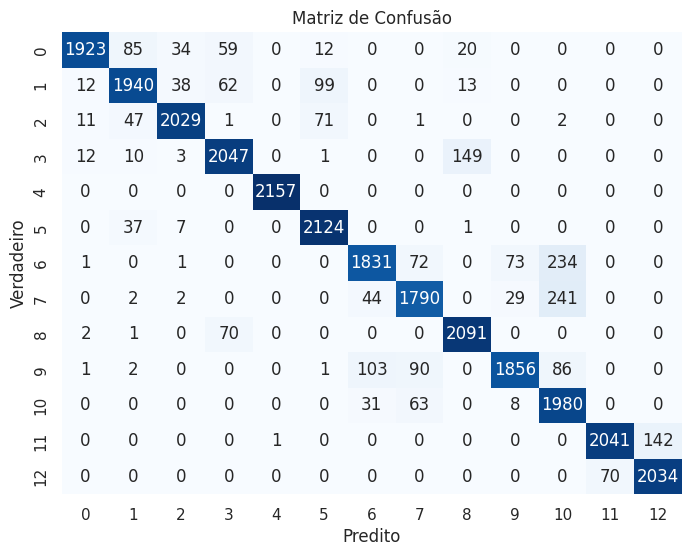

In [ ]:
# Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

---
# **Versão usando *Naive Bayes***

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [ ]:
# Inicializar o modelo de classificação Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)  # Convertendo para array se X_train é uma matriz esparsa

GaussianNB()

In [ ]:
# Avaliação inicial com validação cruzada
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")
print("Acurácia média (Validação Cruzada):", cv_scores.mean())

Acurácia média (Validação Cruzada): 0.8126875


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Previsões no conjunto de teste
y_pred = model.predict(X_test)

In [ ]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {accuracy:.2f}")

Acurácia no conjunto de teste: 0.81


In [ ]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
                                            precision    recall  f1-score   support

   Cystic Fibrosis-Related Diabetes (CFRD)       0.88      0.80      0.84      2133
                      Gestational Diabetes       0.77      0.81      0.79      2164
                                      LADA       0.88      0.85      0.87      2162
                                      MODY       0.80      0.81      0.81      2222
          Neonatal Diabetes Mellitus (NDM)       1.00      1.00      1.00      2157
                               Prediabetic       0.88      0.90      0.89      2169
                        Secondary Diabetes       0.69      0.61      0.65      2212
                  Steroid-Induced Diabetes       0.67      0.67      0.67      2108
                           Type 1 Diabetes       0.84      0.89      0.87      2164
                           Type 2 Diabetes       0.72      0.75      0.74      2139
Type 3c Diabetes (Pancreatogenic Diabetes)     

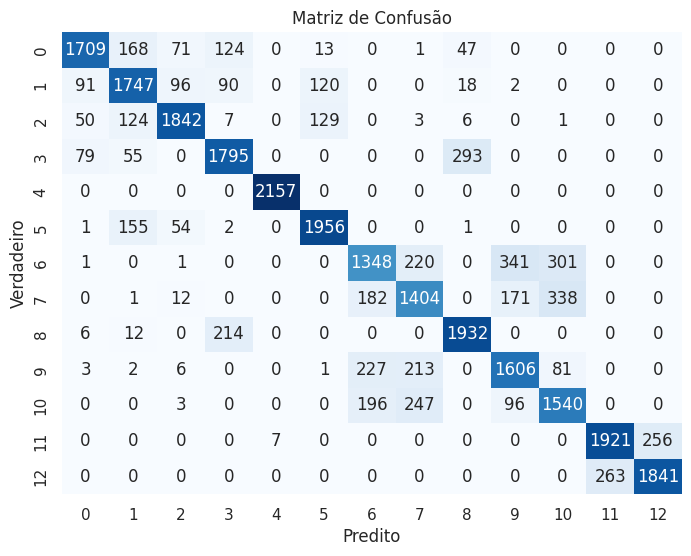

In [ ]:
# Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()

---

# **Conclusão**

## O modelo de previsão de diabetes foi avaliado com base em métricas de desempenho e apresentou os resultados acima.
